In [59]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from collections import defaultdict
from itertools import combinations

In [15]:
df = pd.read_excel('./data.xlsx', index_col = None)
df.head()

,1,2,3,4,5,6,bonus
0,6,24,31,32,38,44,8
1,2,19,26,31,38,41,34
2,1,9,12,13,20,45,3
3,11,13,14,15,16,45,3
4,3,4,9,30,33,36,7


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       1121 non-null   int64
 1   2       1121 non-null   int64
 2   3       1121 non-null   int64
 3   4       1121 non-null   int64
 4   5       1121 non-null   int64
 5   6       1121 non-null   int64
 6   bonus   1121 non-null   int64
dtypes: int64(7)
memory usage: 61.4 KB


In [17]:
df.describe()

,1,2,3,4,5,6,bonus
count,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000,1121.000000
mean,6.716325,13.124888,19.997324,26.296164,32.874219,39.569135,22.380910
std,5.328645,6.868049,7.429490,7.529921,6.841527,5.253986,13.250484
min,1.000000,2.000000,3.000000,5.000000,9.000000,18.000000,1.000000
25%,3.000000,8.000000,14.000000,21.000000,28.000000,37.000000,11.000000
50%,5.000000,12.000000,19.000000,27.000000,34.000000,41.000000,23.000000
75%,10.000000,18.000000,26.000000,32.000000,38.000000,44.000000,34.000000
max,35.000000,37.000000,40.000000,43.000000,44.000000,45.000000,45.000000


In [18]:
df.value_counts()

1   2   3   4   5   6   bonus
1   2   3   9   12  23  10       1
8   10  20  34  41  45  28       1
    11  28  30  43  45  41       1
        19  21  36  45  25       1
        16  19  21  25  40       1
                                ..
3   17  18  23  36  41  26       1
        23  34  41  45  43       1
    18  19  23  32  45  24       1
    19  21  25  37  45  35       1
35  36  37  41  44  45  30       1
Name: count, Length: 1121, dtype: int64

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_24073/2476173828.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=number_counts.index, y=number_counts.values, palette='viridis', hue=None)


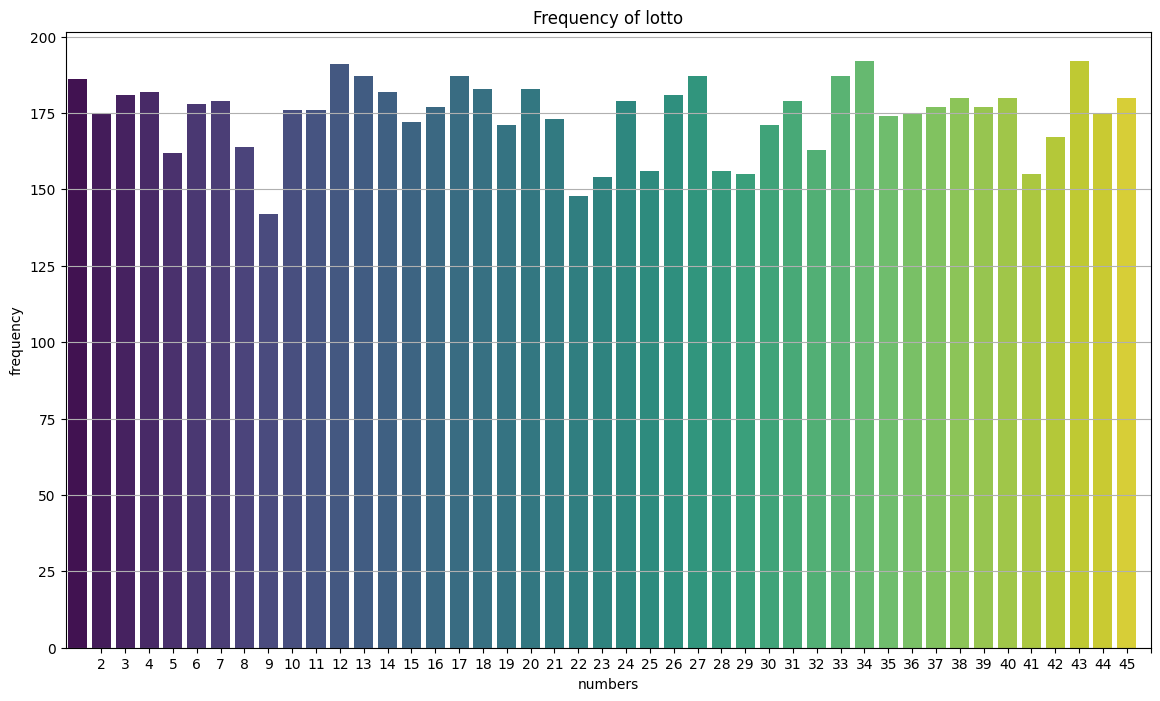

In [31]:
df_long = pd.melt(df, value_vars=[1, 2, 3, 4, 5, 6, 'bonus'],
                  var_name='position', value_name='number')
number_counts = df_long['number'].value_counts().sort_index()

plt.figure(figsize=(14, 8))
sns.barplot(x=number_counts.index, y=number_counts.values, palette='viridis', hue=None)
plt.title('Frequency of lotto')
plt.xlabel('numbers')
plt.ylabel('frequency')
plt.xticks(range(1, 46))
plt.grid(axis='y')

plt.show()

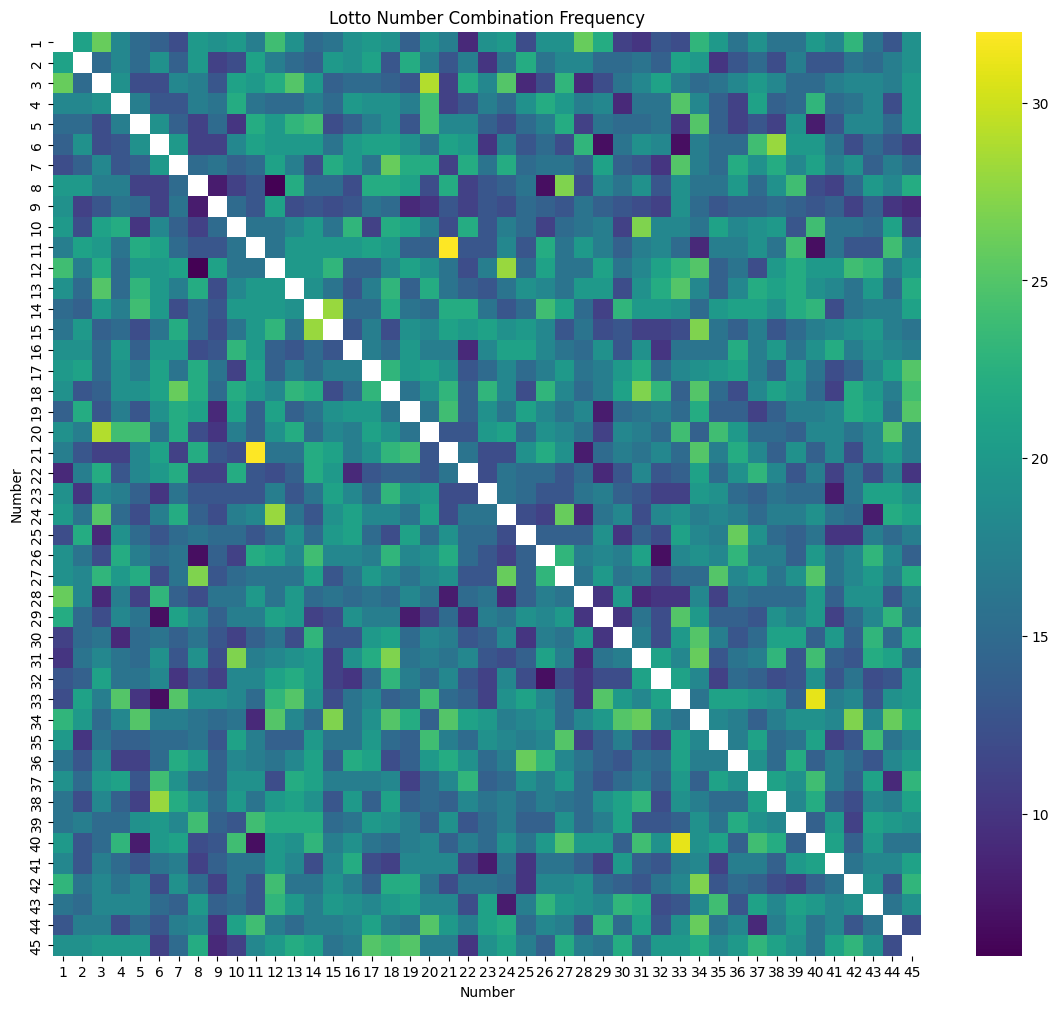

In [35]:
numbers = df[[1, 2, 3, 4, 5, 6]]

comb_count = pd.DataFrame(np.zeros((45, 45)), index=range(1, 46), columns=range(1, 46))

for _, row in numbers.iterrows():
    for combo in combinations(row, 2):
        comb_count.loc[combo[0], combo[1]] += 1
        comb_count.loc[combo[1], combo[0]] += 1

plt.figure(figsize=(14, 12))
mask = comb_count < 0.5
sns.heatmap(comb_count, annot=False, cmap='viridis', mask=mask)
plt.title('Lotto Number Combination Frequency')
plt.xlabel('Number')
plt.ylabel('Number')
plt.show()

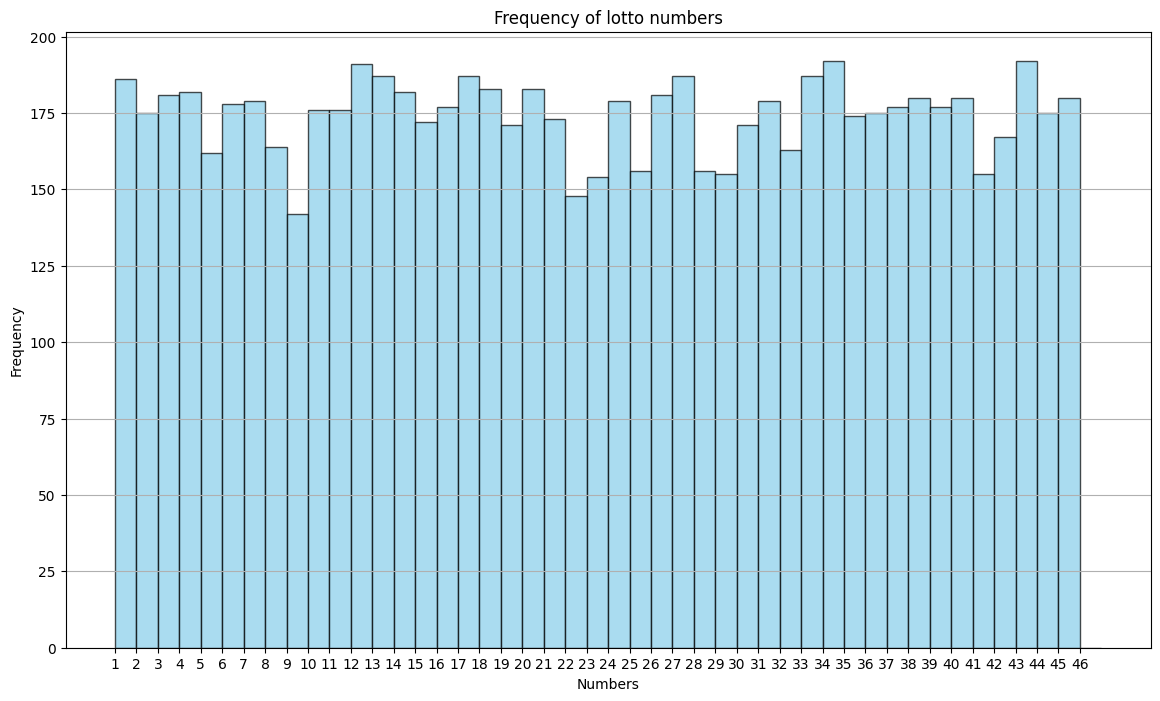

In [37]:
plt.figure(figsize=(14, 8))
plt.hist(df.values.flatten(), bins=range(1, 48), color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Frequency of lotto numbers')
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.xticks(range(1, 47))
plt.grid(axis='y')
plt.show()

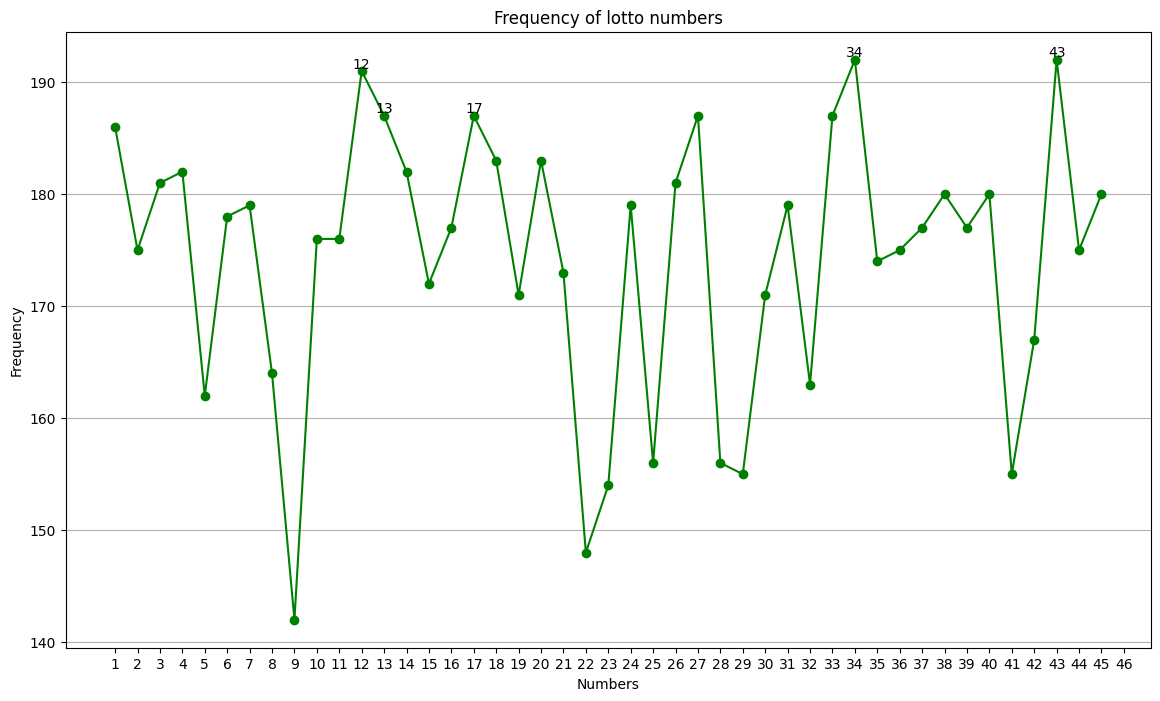

In [42]:
plt.figure(figsize=(14, 8))
number_counts = df.stack().value_counts().sort_index()

top_5_numbers = number_counts.nlargest(5)

plt.plot(number_counts.index, number_counts.values, marker='o', linestyle='-', color='green')
plt.title('Frequency of lotto numbers')
plt.xlabel('Numbers')
plt.ylabel('Frequency')
plt.xticks(range(1, 47))
plt.grid(axis='y')

for number, count in top_5_numbers.items():
    plt.text(number, count, str(number), ha='center', va='bottom')

plt.show()

In [45]:
df.duplicated().sum()

0

In [46]:
duplicates = df[df.duplicated(keep=False)]

duplicate_numbers = duplicates.stack().value_counts()
more_than_once = duplicate_numbers[duplicate_numbers >= 2]

if more_than_once.empty:
    print("1등 당첨번호에서 2번 이상 겹치는 번호가 없습니다.")
else:
    print("1등 당첨번호에서 2번 이상 겹치는 번호:")
    print(more_than_once)

1등 당첨번호에서 2번 이상 겹치는 번호가 없습니다.


In [85]:
combinations_per_draw = []
for _, row in df.iterrows():
    draw_combinations = list(combinations(row, 2))
    combinations_per_draw.append(draw_combinations)

combination_counts = {}
for combinations_draw in combinations_per_draw:
    for combination in combinations_draw:
        if combination in combination_counts:
            combination_counts[combination] += 1
        else:
            combination_counts[combination] = 1
            
frequent_combinations = {k: v for k, v in combination_counts.items() if v > 1}

sorted_combinations = sorted(frequent_combinations.items(), key=lambda x: x[1], reverse=True)

print("각 회차마다 자주 함께 등장하는 조합 (등장 횟수 내림차순):")
for combination, count in sorted_combinations:
    print(combination, ":", count, "번 등장")

각 회차마다 자주 함께 등장하는 조합 (등장 횟수 내림차순):
(11, 21) : 35 번 등장
(3, 20) : 35 번 등장
(33, 40) : 35 번 등장
(12, 24) : 33 번 등장
(7, 18) : 33 번 등장
(6, 38) : 32 번 등장
(14, 15) : 31 번 등장
(12, 34) : 31 번 등장
(7, 33) : 31 번 등장
(24, 27) : 31 번 등장
(12, 38) : 31 번 등장
(3, 13) : 30 번 등장
(13, 33) : 30 번 등장
(10, 31) : 30 번 등장
(12, 42) : 30 번 등장
(3, 10) : 30 번 등장
(1, 28) : 30 번 등장
(18, 32) : 30 번 등장
(8, 27) : 30 번 등장
(31, 34) : 29 번 등장
(11, 44) : 29 번 등장
(3, 24) : 29 번 등장
(26, 27) : 29 번 등장
(31, 40) : 29 번 등장
(31, 43) : 29 번 등장
(19, 45) : 29 번 등장
(18, 31) : 29 번 등장
(34, 44) : 29 번 등장
(25, 36) : 29 번 등장
(27, 35) : 29 번 등장
(20, 33) : 29 번 등장
(15, 34) : 29 번 등장
(4, 20) : 29 번 등장
(31, 38) : 28 번 등장
(19, 34) : 28 번 등장
(26, 31) : 28 번 등장
(1, 3) : 28 번 등장
(11, 13) : 28 번 등장
(4, 33) : 28 번 등장
(20, 44) : 28 번 등장
(20, 24) : 28 번 등장
(12, 33) : 28 번 등장
(37, 40) : 28 번 등장
(26, 43) : 28 번 등장
(14, 35) : 28 번 등장
(1, 34) : 28 번 등장
(23, 43) : 28 번 등장
(10, 35) : 28 번 등장
(35, 43) : 28 번 등장
(11, 39) : 28 번 등장
(29, 33) : 28 번 등장
(34, 42) :

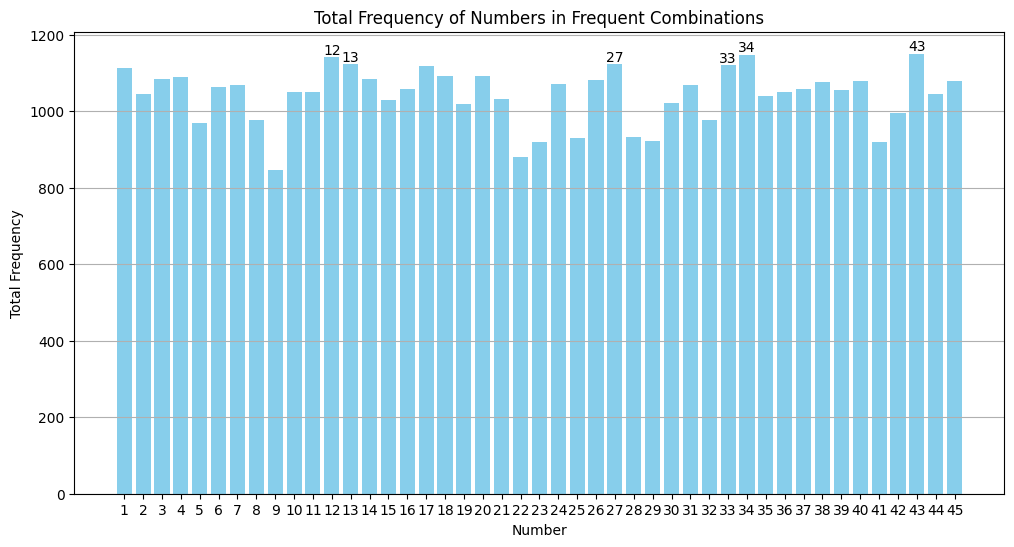

In [87]:
total_frequency = defaultdict(int)
for combination, count in sorted_combinations:
    for number in combination:
        total_frequency[number] += count

plt.figure(figsize=(12, 6))
plt.bar(total_frequency.keys(), total_frequency.values(), color='skyblue')
plt.xlabel('Number')
plt.ylabel('Total Frequency')
plt.title('Total Frequency of Numbers in Frequent Combinations')
plt.xticks(range(1, 46))
plt.grid(axis='y')

top_5_numbers = sorted(total_frequency.items(), key=lambda x: x[1], reverse=True)[:6]
for number, frequency in top_5_numbers:
    plt.text(number, frequency, str(number), ha='center', va='bottom')

plt.show()

In [77]:
combinations_per_draw = []
for _, row in df.iterrows():
    draw_combinations = list(combinations(row, 3))
    combinations_per_draw.append(draw_combinations)

combination_counts = {}
for combinations_draw in combinations_per_draw:
    for combination in combinations_draw:
        if combination in combination_counts:
            combination_counts[combination] += 1
        else:
            combination_counts[combination] = 1

frequent_combinations = {k: v for k, v in combination_counts.items() if v > 1}

sorted_combinations = sorted(frequent_combinations.items(), key=lambda x: x[1], reverse=True)

print("각 회차마다 자주 함께 등장하는 3개의 숫자로 이루어진 조합:")
for combination, count in sorted_combinations:
    print(combination, ":", count, "번 등장")

각 회차마다 자주 함께 등장하는 3개의 숫자로 이루어진 조합:
(3, 20, 24) : 9 번 등장
(3, 10, 36) : 9 번 등장
(23, 35, 43) : 9 번 등장
(12, 33, 42) : 8 번 등장
(17, 26, 36) : 8 번 등장
(3, 20, 44) : 8 번 등장
(3, 8, 27) : 8 번 등장
(2, 25, 28) : 8 번 등장
(8, 17, 27) : 8 번 등장
(7, 42, 45) : 8 번 등장
(6, 31, 38) : 7 번 등장
(12, 23, 34) : 7 번 등장
(12, 13, 33) : 7 번 등장
(14, 31, 40) : 7 번 등장
(12, 24, 41) : 7 번 등장
(33, 37, 40) : 7 번 등장
(10, 35, 43) : 7 번 등장
(19, 21, 45) : 7 번 등장
(27, 35, 37) : 7 번 등장
(8, 18, 45) : 7 번 등장
(6, 18, 38) : 7 번 등장
(20, 23, 43) : 7 번 등장
(2, 11, 39) : 7 번 등장
(11, 16, 21) : 7 번 등장
(3, 23, 24) : 7 번 등장
(25, 29, 36) : 7 번 등장
(7, 18, 23) : 7 번 등장
(12, 15, 24) : 7 번 등장
(15, 28, 34) : 7 번 등장
(34, 42, 44) : 7 번 등장
(11, 14, 21) : 7 번 등장
(21, 26, 36) : 7 번 등장
(12, 26, 38) : 7 번 등장
(12, 15, 34) : 7 번 등장
(16, 17, 36) : 7 번 등장
(13, 29, 39) : 7 번 등장
(1, 3, 27) : 7 번 등장
(1, 24, 27) : 7 번 등장
(18, 31, 38) : 7 번 등장
(6, 37, 38) : 7 번 등장
(12, 34, 42) : 7 번 등장
(18, 31, 34) : 7 번 등장
(12, 33, 38) : 7 번 등장
(18, 30, 41) : 7 번 등장
(13, 32, 42) : 

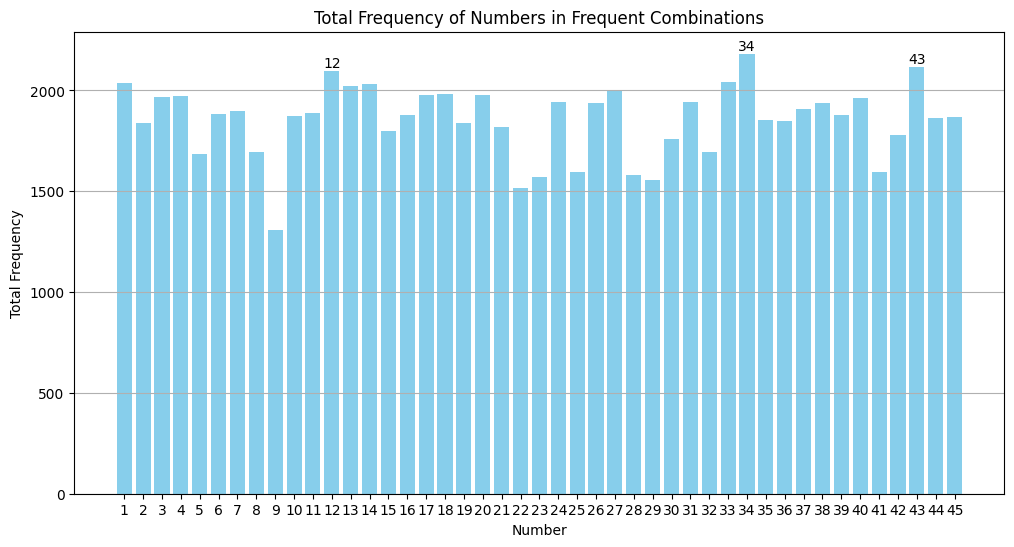

In [78]:
total_frequency = defaultdict(int)
for combination, count in sorted_combinations:
    for number in combination:
        total_frequency[number] += count

plt.figure(figsize=(12, 6))
plt.bar(total_frequency.keys(), total_frequency.values(), color='skyblue')
plt.xlabel('Number')
plt.ylabel('Total Frequency')
plt.title('Total Frequency of Numbers in Frequent Combinations')
plt.xticks(range(1, 46))
plt.grid(axis='y')

top_5_numbers = sorted(total_frequency.items(), key=lambda x: x[1], reverse=True)[:3]
for number, frequency in top_5_numbers:
    plt.text(number, frequency, str(number), ha='center', va='bottom')

plt.show()

In [79]:
combinations_per_draw = []
for _, row in df.iterrows():
    draw_combinations = list(combinations(row, 4))
    combinations_per_draw.append(draw_combinations)

combination_counts = {}
for combinations_draw in combinations_per_draw:
    for combination in combinations_draw:
        if combination in combination_counts:
            combination_counts[combination] += 1
        else:
            combination_counts[combination] = 1

frequent_combinations = {k: v for k, v in combination_counts.items() if v > 1}

sorted_combinations = sorted(frequent_combinations.items(), key=lambda x: x[1], reverse=True)

print("각 회차마다 자주 함께 등장하는 4개의 숫자로 이루어진 조합:")
for combination, count in sorted_combinations:
    print(combination, ":", count, "번 등장")

각 회차마다 자주 함께 등장하는 4개의 숫자로 이루어진 조합:
(11, 21, 30, 39) : 4 번 등장
(12, 29, 33, 42) : 4 번 등장
(6, 7, 19, 38) : 4 번 등장
(16, 19, 32, 33) : 3 번 등장
(7, 37, 39, 44) : 3 번 등장
(14, 30, 31, 40) : 3 번 등장
(1, 4, 29, 45) : 3 번 등장
(3, 20, 38, 40) : 3 번 등장
(1, 23, 43, 34) : 3 번 등장
(23, 28, 30, 44) : 3 번 등장
(4, 19, 26, 35) : 3 번 등장
(11, 16, 19, 21) : 3 번 등장
(32, 40, 41, 45) : 3 번 등장
(4, 12, 22, 33) : 3 번 등장
(5, 26, 27, 38) : 3 번 등장
(5, 26, 27, 1) : 3 번 등장
(6, 12, 17, 21) : 3 번 등장
(6, 12, 17, 32) : 3 번 등장
(6, 14, 21, 37) : 3 번 등장
(14, 15, 23, 43) : 3 번 등장
(16, 26, 31, 36) : 3 번 등장
(1, 4, 13, 39) : 3 번 등장
(18, 23, 30, 34) : 3 번 등장
(11, 19, 21, 25) : 3 번 등장
(4, 13, 29, 39) : 3 번 등장
(1, 3, 24, 27) : 3 번 등장
(3, 8, 27, 35) : 3 번 등장
(16, 24, 42, 44) : 3 번 등장
(13, 23, 35, 43) : 3 번 등장
(3, 13, 24, 35) : 3 번 등장
(6, 17, 18, 21) : 3 번 등장
(2, 12, 24, 39) : 3 번 등장
(6, 37, 38, 40) : 3 번 등장
(4, 12, 24, 33) : 3 번 등장
(12, 24, 33, 38) : 3 번 등장
(12, 30, 39, 43) : 3 번 등장
(4, 10, 20, 44) : 3 번 등장
(21, 25, 39, 44) : 3 번 등장
(3, 4

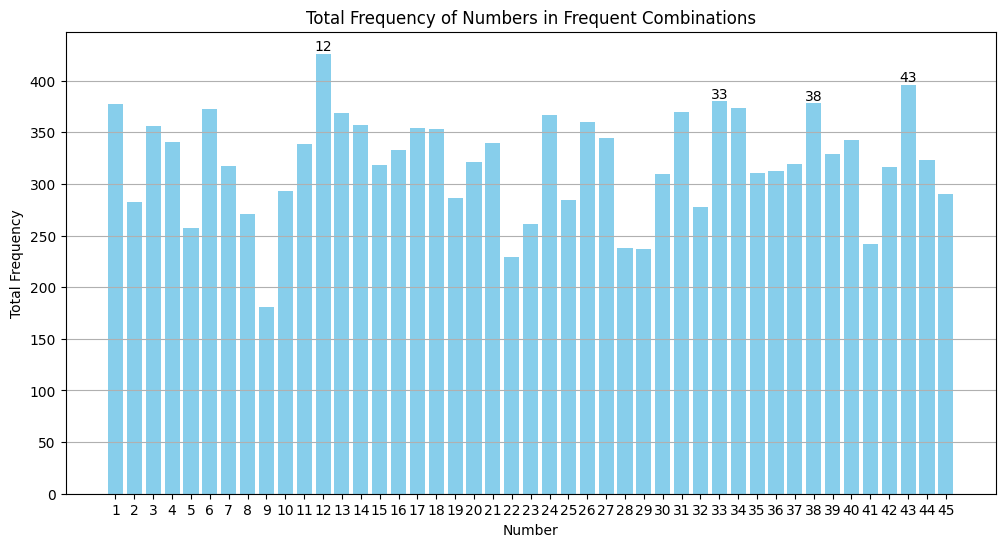

In [80]:
total_frequency = defaultdict(int)
for combination, count in sorted_combinations:
    for number in combination:
        total_frequency[number] += count

plt.figure(figsize=(12, 6))
plt.bar(total_frequency.keys(), total_frequency.values(), color='skyblue')
plt.xlabel('Number')
plt.ylabel('Total Frequency')
plt.title('Total Frequency of Numbers in Frequent Combinations')
plt.xticks(range(1, 46))
plt.grid(axis='y')

top_5_numbers = sorted(total_frequency.items(), key=lambda x: x[1], reverse=True)[:4]
for number, frequency in top_5_numbers:
    plt.text(number, frequency, str(number), ha='center', va='bottom')

plt.show()

In [81]:
combinations_per_draw = []
for _, row in df.iterrows():
    draw_combinations = list(combinations(row, 5))
    combinations_per_draw.append(draw_combinations)

combination_counts = {}
for combinations_draw in combinations_per_draw:
    for combination in combinations_draw:
        if combination in combination_counts:
            combination_counts[combination] += 1
        else:
            combination_counts[combination] = 1

frequent_combinations = {k: v for k, v in combination_counts.items() if v > 1}

sorted_combinations = sorted(frequent_combinations.items(), key=lambda x: x[1], reverse=True)

print("각 회차마다 자주 함께 등장하는 5개의 숫자로 이루어진 조합:")
for combination, count in sorted_combinations:
    print(combination, ":", count, "번 등장")

각 회차마다 자주 함께 등장하는 5개의 숫자로 이루어진 조합:
(1, 12, 23, 43, 34) : 2 번 등장
(20, 23, 28, 30, 44) : 2 번 등장
(4, 8, 18, 37, 45) : 2 번 등장
(6, 20, 27, 28, 15) : 2 번 등장
(25, 30, 32, 40, 42) : 2 번 등장
(5, 26, 27, 38, 1) : 2 번 등장
(6, 12, 31, 38, 43) : 2 번 등장
(6, 22, 32, 35, 36) : 2 번 등장
(8, 11, 19, 21, 25) : 2 번 등장
(7, 37, 39, 44, 18) : 2 번 등장
(25, 33, 38, 45, 15) : 2 번 등장
(1, 4, 13, 39, 7) : 2 번 등장
(16, 18, 24, 42, 44) : 2 번 등장
(5, 7, 13, 20, 33) : 2 번 등장
(3, 13, 23, 24, 35) : 2 번 등장
(2, 12, 14, 24, 39) : 2 번 등장
(4, 12, 22, 24, 33) : 2 번 등장
(4, 12, 24, 33, 38) : 2 번 등장
(8, 21, 25, 39, 44) : 2 번 등장
(3, 4, 10, 28, 30) : 2 번 등장
(3, 4, 20, 28, 44) : 2 번 등장
(5, 12, 14, 32, 42) : 2 번 등장
(9, 34, 37, 39, 12) : 2 번 등장
(3, 12, 13, 19, 35) : 2 번 등장
(13, 14, 26, 40, 43) : 2 번 등장
(12, 15, 20, 24, 30) : 2 번 등장
(12, 15, 20, 24, 38) : 2 번 등장
(12, 15, 20, 30, 38) : 2 번 등장
(12, 15, 24, 30, 38) : 2 번 등장
(12, 20, 24, 30, 38) : 2 번 등장
(15, 20, 24, 30, 38) : 2 번 등장
(6, 18, 31, 38, 45) : 2 번 등장
(1, 3, 8, 42, 43) : 2 번 등장
(7, 22

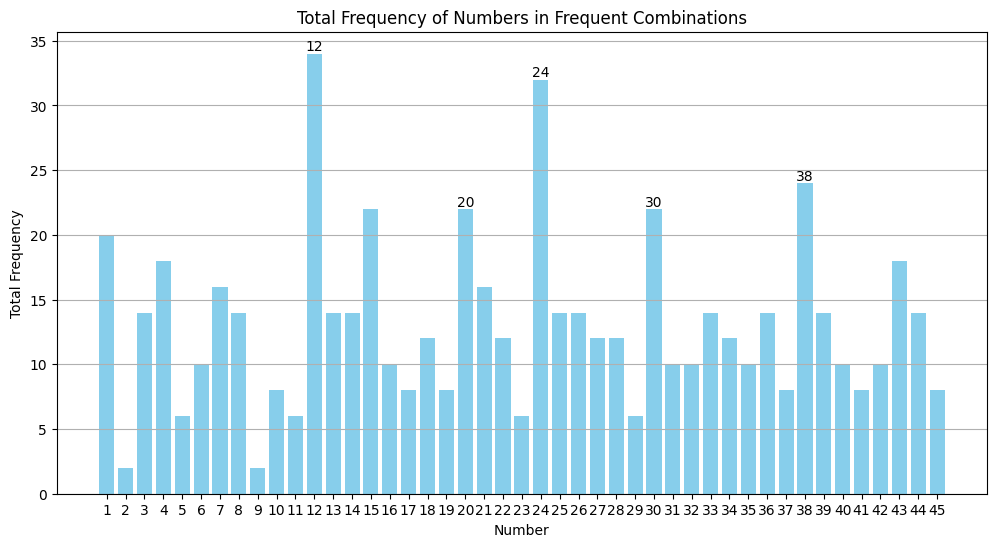

In [82]:
total_frequency = defaultdict(int)
for combination, count in sorted_combinations:
    for number in combination:
        total_frequency[number] += count

plt.figure(figsize=(12, 6))
plt.bar(total_frequency.keys(), total_frequency.values(), color='skyblue')
plt.xlabel('Number')
plt.ylabel('Total Frequency')
plt.title('Total Frequency of Numbers in Frequent Combinations')
plt.xticks(range(1, 46))
plt.grid(axis='y')

top_5_numbers = sorted(total_frequency.items(), key=lambda x: x[1], reverse=True)[:5]
for number, frequency in top_5_numbers:
    plt.text(number, frequency, str(number), ha='center', va='bottom')

plt.show()

In [83]:
combination_counts = defaultdict(int)

for _, row in df.iterrows():
    for combination in combinations(row, 6):
        combination_counts[combination] += 1

sorted_combinations = sorted(combination_counts.items(), key=lambda x: x[1], reverse=True)

print("각 회차마다 자주 함께 등장하는 6개의 숫자로 이루어진 조합:")
for combination, count in sorted_combinations:
    print(combination, ":", count, "번 등장")

각 회차마다 자주 함께 등장하는 6개의 숫자로 이루어진 조합:
(12, 15, 20, 24, 30, 38) : 2 번 등장
(6, 24, 31, 32, 38, 44) : 1 번 등장
(6, 24, 31, 32, 38, 8) : 1 번 등장
(6, 24, 31, 32, 44, 8) : 1 번 등장
(6, 24, 31, 38, 44, 8) : 1 번 등장
(6, 24, 32, 38, 44, 8) : 1 번 등장
(6, 31, 32, 38, 44, 8) : 1 번 등장
(24, 31, 32, 38, 44, 8) : 1 번 등장
(2, 19, 26, 31, 38, 41) : 1 번 등장
(2, 19, 26, 31, 38, 34) : 1 번 등장
(2, 19, 26, 31, 41, 34) : 1 번 등장
(2, 19, 26, 38, 41, 34) : 1 번 등장
(2, 19, 31, 38, 41, 34) : 1 번 등장
(2, 26, 31, 38, 41, 34) : 1 번 등장
(19, 26, 31, 38, 41, 34) : 1 번 등장
(1, 9, 12, 13, 20, 45) : 1 번 등장
(1, 9, 12, 13, 20, 3) : 1 번 등장
(1, 9, 12, 13, 45, 3) : 1 번 등장
(1, 9, 12, 20, 45, 3) : 1 번 등장
(1, 9, 13, 20, 45, 3) : 1 번 등장
(1, 12, 13, 20, 45, 3) : 1 번 등장
(9, 12, 13, 20, 45, 3) : 1 번 등장
(11, 13, 14, 15, 16, 45) : 1 번 등장
(11, 13, 14, 15, 16, 3) : 1 번 등장
(11, 13, 14, 15, 45, 3) : 1 번 등장
(11, 13, 14, 16, 45, 3) : 1 번 등장
(11, 13, 15, 16, 45, 3) : 1 번 등장
(11, 14, 15, 16, 45, 3) : 1 번 등장
(13, 14, 15, 16, 45, 3) : 1 번 등장
(3, 4, 9, 30, 33, 36)

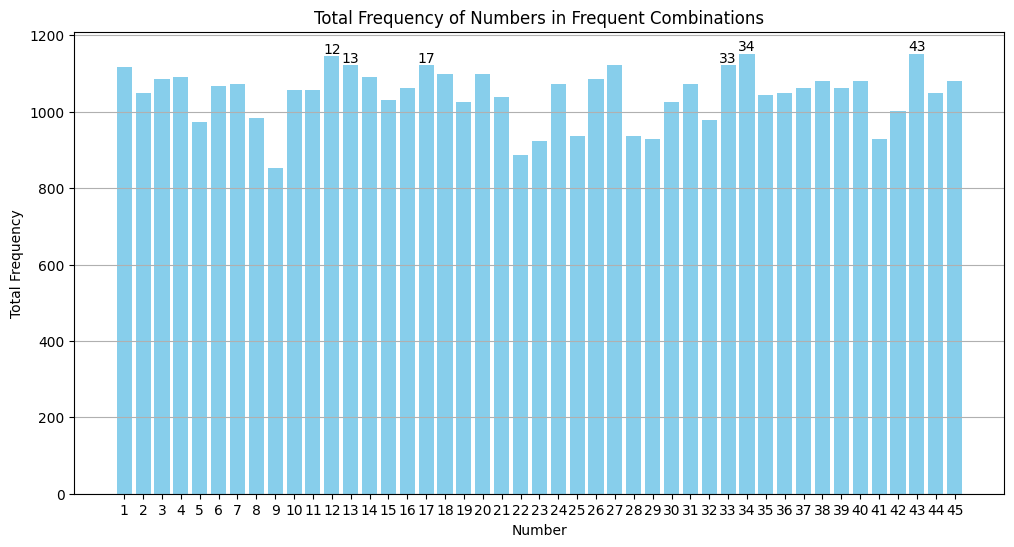

In [84]:
total_frequency = defaultdict(int)
for combination, count in sorted_combinations:
    for number in combination:
        total_frequency[number] += count

plt.figure(figsize=(12, 6))
plt.bar(total_frequency.keys(), total_frequency.values(), color='skyblue')
plt.xlabel('Number')
plt.ylabel('Total Frequency')
plt.title('Total Frequency of Numbers in Frequent Combinations')
plt.xticks(range(1, 46))
plt.grid(axis='y')

top_5_numbers = sorted(total_frequency.items(), key=lambda x: x[1], reverse=True)[:6]
for number, frequency in top_5_numbers:
    plt.text(number, frequency, str(number), ha='center', va='bottom')

plt.show()

In [64]:
consecutive_numbers = []

for _, row in df.iterrows():
    previous_number = None
    consecutive_numbers_in_draw = []
    for number in row:
        if previous_number is not None and number - previous_number == 1:
            consecutive_numbers_in_draw.append((previous_number, number))
        previous_number = number
    consecutive_numbers.append(consecutive_numbers_in_draw)

print("연속해서 나온 숫자들:")
for i, draw in enumerate(consecutive_numbers, start=1):
    if draw:
        print(f"회차 {i}: {draw}")

연속해서 나온 숫자들:
회차 1: [(31, 32)]
회차 3: [(12, 13)]
회차 4: [(13, 14), (14, 15), (15, 16)]
회차 5: [(3, 4)]
회차 6: [(15, 16), (16, 17), (30, 31), (31, 32)]
회차 8: [(32, 33)]
회차 9: [(20, 21)]
회차 13: [(12, 13)]
회차 15: [(30, 31), (40, 41)]
회차 16: [(3, 4)]
회차 17: [(39, 40)]
회차 20: [(13, 14), (37, 38)]
회차 21: [(6, 7)]
회차 22: [(29, 30), (30, 31)]
회차 25: [(33, 34), (34, 35)]
회차 27: [(28, 29)]
회차 28: [(6, 7), (40, 41)]
회차 29: [(43, 44)]
회차 30: [(18, 19)]
회차 31: [(23, 24)]
회차 33: [(42, 43)]
회차 34: [(21, 22)]
회차 35: [(13, 14)]
회차 36: [(35, 36), (36, 37)]
회차 37: [(17, 18)]
회차 38: [(12, 13)]
회차 39: [(14, 15)]
회차 40: [(26, 27)]
회차 41: [(23, 24)]
회차 44: [(10, 11)]
회차 46: [(36, 37)]
회차 47: [(23, 24), (44, 45)]
회차 48: [(27, 28)]
회차 51: [(1, 2)]
회차 57: [(18, 19)]
회차 59: [(22, 23), (23, 24)]
회차 60: [(31, 32), (40, 41)]
회차 68: [(27, 28)]
회차 69: [(29, 30)]
회차 70: [(26, 27)]
회차 71: [(32, 33)]
회차 73: [(20, 21)]
회차 76: [(35, 36)]
회차 77: [(14, 15)]
회차 80: [(14, 15)]
회차 81: [(6, 7), (17, 18)]
회차 83: [(2, 3)]
회차 85: [(14,

In [89]:
all_numbers = pd.concat([df[1], df[2], df[3], df[4], df[5], df[6]]).astype(float)
frequency = all_numbers.value_counts().sort_index()

frequency

1.0     155
2.0     143
3.0     152
4.0     149
5.0     140
6.0     147
7.0     152
8.0     141
9.0     118
10.0    149
11.0    152
12.0    164
13.0    161
14.0    161
15.0    148
16.0    150
17.0    157
18.0    165
19.0    151
20.0    157
21.0    151
22.0    134
23.0    136
24.0    149
25.0    138
26.0    152
27.0    158
28.0    135
29.0    140
30.0    141
31.0    152
32.0    133
33.0    158
34.0    169
35.0    146
36.0    151
37.0    154
38.0    152
39.0    153
40.0    159
41.0    138
42.0    144
43.0    157
44.0    151
45.0    163
Name: count, dtype: int64

In [111]:
probabilities = frequency / frequency.sum()

predicted_sets = []
for _ in range(5):
    predicted_set = np.random.choice(probabilities.index, size=6, replace=False, p=probabilities.values)
    predicted_sets.append(np.sort(predicted_set))
    
predicted_sets

[array([ 5.,  6., 11., 15., 33., 36.]),
 array([ 1., 12., 18., 19., 36., 40.]),
 array([ 2., 20., 21., 29., 36., 39.]),
 array([12., 16., 24., 30., 35., 43.]),
 array([ 1., 10., 11., 21., 30., 43.])]

In [112]:
probabilities

1.0     0.023045
2.0     0.021261
3.0     0.022599
4.0     0.022153
5.0     0.020815
6.0     0.021855
7.0     0.022599
8.0     0.020963
9.0     0.017544
10.0    0.022153
11.0    0.022599
12.0    0.024383
13.0    0.023937
14.0    0.023937
15.0    0.022004
16.0    0.022302
17.0    0.023342
18.0    0.024532
19.0    0.022450
20.0    0.023342
21.0    0.022450
22.0    0.019923
23.0    0.020220
24.0    0.022153
25.0    0.020517
26.0    0.022599
27.0    0.023491
28.0    0.020071
29.0    0.020815
30.0    0.020963
31.0    0.022599
32.0    0.019774
33.0    0.023491
34.0    0.025126
35.0    0.021707
36.0    0.022450
37.0    0.022896
38.0    0.022599
39.0    0.022748
40.0    0.023640
41.0    0.020517
42.0    0.021409
43.0    0.023342
44.0    0.022450
45.0    0.024234
Name: count, dtype: float64